In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score , accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
cab=pd.read_csv("cab.csv")
cab.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [4]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        16043 non-null  object 
 1   pickup_datetime    16067 non-null  object 
 2   pickup_longitude   16067 non-null  float64
 3   pickup_latitude    16067 non-null  float64
 4   dropoff_longitude  16067 non-null  float64
 5   dropoff_latitude   16067 non-null  float64
 6   passenger_count    16012 non-null  float64
dtypes: float64(5), object(2)
memory usage: 878.8+ KB


In [5]:
cab.shape

(16067, 7)

In [6]:
cab.isnull().sum()

fare_amount          24
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [7]:
cab= cab.dropna()

In [8]:
cab.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

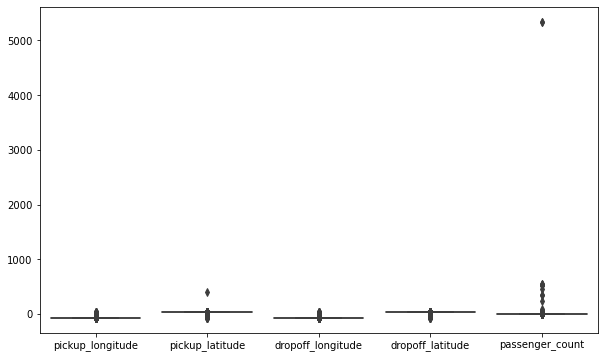

In [9]:
features = cab[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
plt.figure(figsize=(10, 6))
sns.boxplot(data=features)
plt.show()

In [10]:
# Define a function to remove outliers using the IQR method
cab['fare_amount']=pd.to_numeric(cab['fare_amount'],errors='coerce')
def remove_outliers(cab, column):
    Q1 = cab[column].quantile(0.25)
    Q3 = cab[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return cab[(cab[column] >= lower_bound) & (cab[column] <= upper_bound)]

# Apply the function to the dataset
# You may choose relevant columns for outlier removal
columns_to_check = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
data_cleaned = cab.copy()

for column in columns_to_check:
    data_cleaned = remove_outliers(data_cleaned, column)

# Check the shape of the dataset before and after outlier removal
print("Original dataset shape:", cab.shape)
print("Cleaned dataset shape:", data_cleaned.shape)

Original dataset shape: (15988, 7)
Cleaned dataset shape: (11811, 7)


In [11]:
features1 = data_cleaned[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
target = data_cleaned['fare_amount']

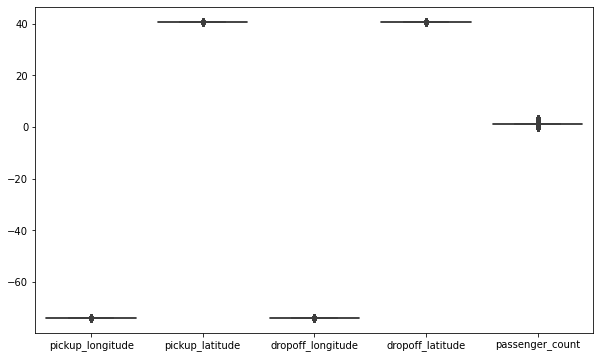

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=features1)
plt.show()

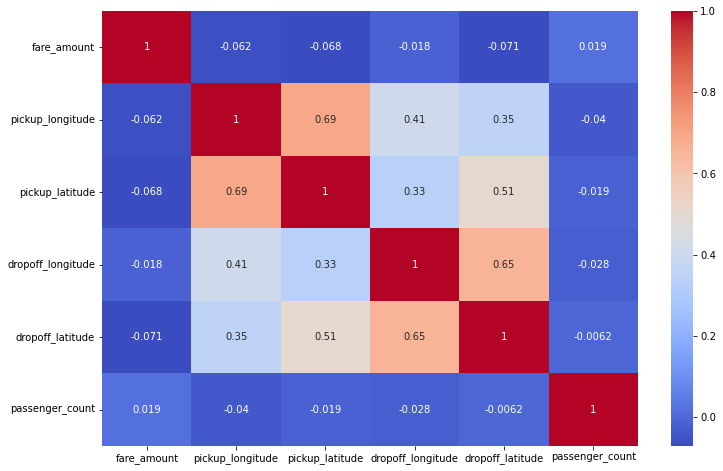

In [13]:
# Check for non-numeric columns
# non_numeric_cols = data_cleaned.select_dtypes(exclude=[np.number]).columns
# print("Non-numeric columns to be handled:", non_numeric_cols)

# Drop non-numeric columns for correlation calculation
data_numeric = data_cleaned.select_dtypes(include=[np.number])

# Correlation matrix
correlation_matrix = data_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [13]:
x_train, x_test, y_train, y_test = train_test_split(features1, target, test_size=0.3, random_state=42)

In [14]:
#  Standardizing the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred_linear = reg.predict(x_test)

In [16]:
# Implement Lasso Regression
from sklearn.linear_model import Lasso
lasso_regressor = Lasso(alpha=0.1)
lasso_regressor.fit(x_train, y_train)
y_pred_lasso = lasso_regressor.predict(x_test)

In [17]:
from sklearn.linear_model import Ridge
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(x_train, y_train)
y_pred_ridge = ridge_regressor.predict(x_test)

In [18]:
def evaluate_model(y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return rmse, mae, r2

In [19]:
linear_rmse, linear_mae, linear_r2 = evaluate_model(y_test, y_pred_linear)
ridge_rmse, ridge_mae, ridge_r2 = evaluate_model(y_test, y_pred_ridge)
lasso_rmse, lasso_mae, lasso_r2 = evaluate_model(y_test, y_pred_lasso)

In [20]:
# Print evaluation metrics
print("Linear Regression: RMSE =", linear_rmse, ", MAE =", linear_mae, ", R2 =", linear_r2)
print("Ridge Regression: RMSE =", ridge_rmse, ", MAE =", ridge_mae, ", R2 =", ridge_r2)
print("Lasso Regression: RMSE =", lasso_rmse, ", MAE =", lasso_mae, ", R2 =", lasso_r2)

Linear Regression: RMSE = 3.8460311411804535 , MAE = 3.0317364689342323 , R2 = 0.006591469375678893
Ridge Regression: RMSE = 3.8460270513767525 , MAE = 3.031734233244488 , R2 = 0.006593582121819375
Lasso Regression: RMSE = 3.847071423833416 , MAE = 3.036410246957882 , R2 = 0.0060539982084655275
